## Z2343961J_JOSE_LEAL_PRACTICA_PYTHON_AVANZADO.ipynb ##

Practica del modulo de Python avanzado - Jose Leal 

## 1. Importar todas las librerías necesarias ##

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns # Libreria que utilizaremos para el color en los graficos

## 2. Inicializar algunas variables que después modicaremos. ##

In [2]:
df = None
hostnames = []
os = []
dataset = []

## 3. Crear una función para generar los hostnames en base a unas reglas ##

In [3]:
hostnames = []

# 40% Linux | 30% Solaris | 20% AIX | 10% HP-UX
# 10% Development | 10% Integration | 25% Testing | 25% Staging | 30% Production 
# 06% Norway | 09% France | 16% Italy | 16% Spain | 23% Germany | 30% Ireland 

def set_hostnames(number_of_hosts: int) -> None:
    os_prefix = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1  
    enviroments = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    alpha_3_country_codes = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    grupo_alpha = []
    for i in range(number_of_hosts):
        country = random.choice(alpha_3_country_codes)
        hostname = random.choice(os_prefix) + random.choice(enviroments)
        hostname += country
        grupo_alpha.append(hostname)
        hostname += str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)

## 4. Crear una función para obtener el nombre del SO ##

In [4]:
def get_os(hostname:str)->None:
    """
    Parametros:
    hostname (str): 

    Returns:
    os(str) : Linux,Solaris,AIX,HP-UX o Unknow.
    
    """
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else :
        return 'Unknow'

## 5. Crear una función para obtener el nombre del entorno ##

In [5]:
def get_environment(hostname:str)-> None:
    """
    Parametros:
    hostname (str): 

    Returns:
    Environment(str) : Integration,Testing,Development,Staging,Production o Unknow.
    
    """
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else :
        return 'Unknow'

## 6. Crear una función para obtener el nombre del país ##

In [6]:
def get_country(hostname:str)-> None :
    """
    Parametros:
    hostname (str): 

    Returns:
    Paises(str): NOR,DEU,ITA,ESP,IRL,FRA o Unknow.
    
    """
    if hostname[2:5] ==  'NOR':
        return 'Norway'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    elif hostname[2:5] == 'FRA':
        return 'France'
    else : 
        return 'Unknow'

## 7. Crear una función para generar el DataFrame. ##

In [7]:
def set_dataframe(count:int)-> None:
    global df
    set_hostnames(count)
    
    for hostname in hostnames :
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname=hostname),
            'environment': get_environment(hostname=hostname) ,
            'country': get_country(hostname=hostname),
            'node': int(hostname[-2:]),
            
        })
        
    df = pd.DataFrame(dataset)

## 8. Crear el DataFrame. ##

In [8]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,STIRL001,Solaris,Testing,Ireland,1
1,ASNOR001,AIX,Staging,Norway,1
2,LTIRL001,Linux,Testing,Ireland,1
3,LPIRL001,Linux,Production,Ireland,1
4,ASITA001,AIX,Staging,Italy,1
...,...,...,...,...,...
1495,LTIRL051,Linux,Testing,Ireland,51
1496,AIDEU009,AIX,Integration,Germany,9
1497,LSITA029,Linux,Staging,Italy,29
1498,HSDEU009,HP-UX,Staging,Germany,9


## 9. Guardar el DataFrame generado en un fichero CSV. ##

In [9]:
df.to_csv(
'hosts.csv',
header=True,
index=False
)


In [10]:
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,STIRL001,Solaris,Testing,Ireland,1
1,ASNOR001,AIX,Staging,Norway,1
2,LTIRL001,Linux,Testing,Ireland,1
3,LPIRL001,Linux,Production,Ireland,1
4,ASITA001,AIX,Staging,Italy,1
...,...,...,...,...,...
1495,LTIRL051,Linux,Testing,Ireland,51
1496,AIDEU009,AIX,Integration,Germany,9
1497,LSITA029,Linux,Staging,Italy,29
1498,HSDEU009,HP-UX,Staging,Germany,9


## 10. Generar un único gráfico, agrupando para cada país (country) los entornos (environment). ##

In [11]:
numero_paises = df.groupby(['country','environment']).size()

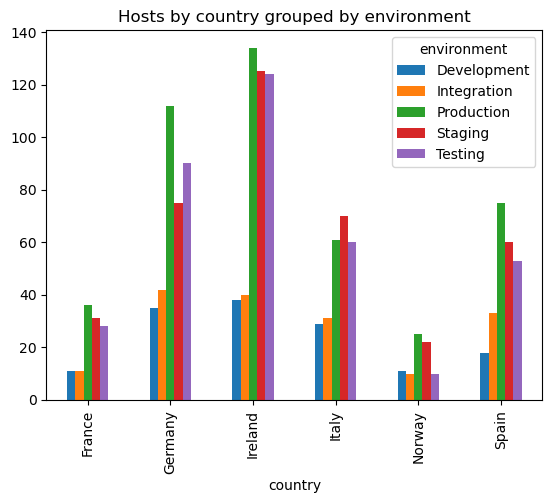

In [12]:
numero_paises.unstack().plot(kind='bar');
plt.title('Hosts by country grouped by environment')
plt.show()

## 11.Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas. 

## Figura 1 

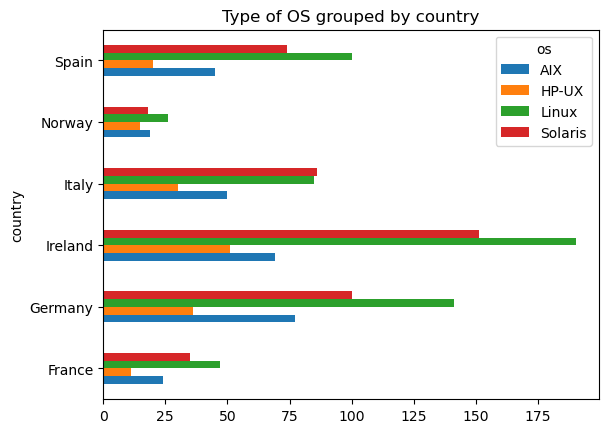

In [13]:
type_os = df.groupby(['country','os']).size().unstack()
type_os.plot(kind='barh');
plt.title('Type of OS grouped by country')
plt.show()

## Figura 2

In [14]:
df_hosts_country = df['country'].value_counts().reset_index()
df

,hostname,os,environment,country,node
0,STIRL001,Solaris,Testing,Ireland,1
1,ASNOR001,AIX,Staging,Norway,1
2,LTIRL001,Linux,Testing,Ireland,1
3,LPIRL001,Linux,Production,Ireland,1
4,ASITA001,AIX,Staging,Italy,1
...,...,...,...,...,...
1495,LTIRL051,Linux,Testing,Ireland,51
1496,AIDEU009,AIX,Integration,Germany,9
1497,LSITA029,Linux,Staging,Italy,29
1498,HSDEU009,HP-UX,Staging,Germany,9


In [15]:
df_hosts_country.rename({'index':'country', 'country':'Number of hosts'}, axis=1,inplace=True)

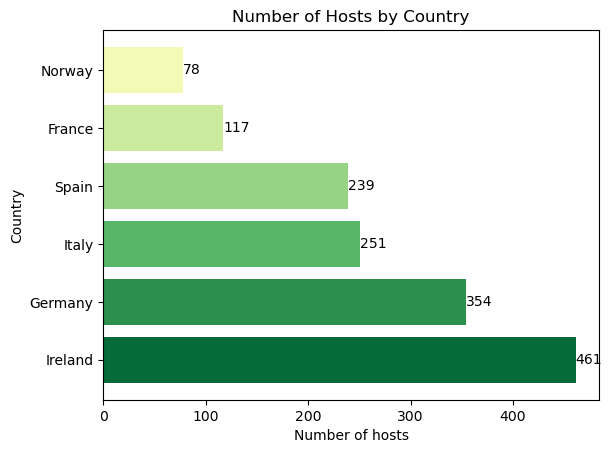

In [16]:
df_hosts_country.columns = ['country', 'Number of hosts']

grafico = plt.barh(y=df_hosts_country['country'], width=df_hosts_country['Number of hosts'], color=sns.color_palette("YlGn_r"))
plt.bar_label(grafico, label_type="edge")
plt.xlabel('Number of hosts')
plt.ylabel('Country')
plt.title('Number of Hosts by Country')
plt.show()

## Figura 3

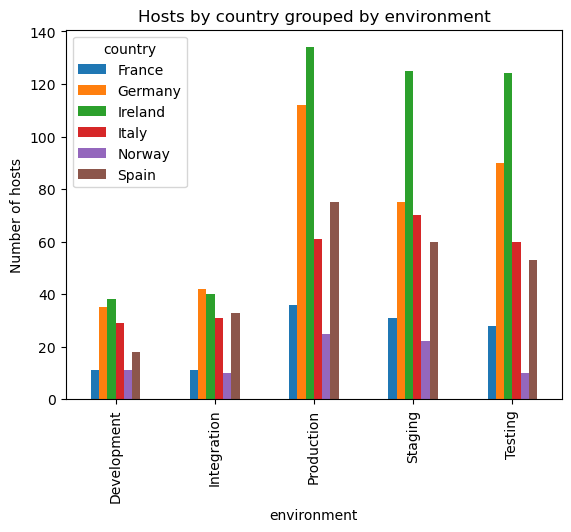

In [17]:
#numero_paises.unstack(0).plot(kind='bar');

numero_paises_df = numero_paises.unstack(0)
numero_paises_df.plot(kind='bar')
plt.title('Hosts by country grouped by environment')
plt.ylabel("Number of hosts")
plt.show()

##  Figura 4

Vamos a utilizar la funcion de de reset index para de esa manera tener  un Dataframe en lugar de uma serie de valores agrupados 

In [18]:
df_pie  = df['os'].value_counts().reset_index()
df_pie

,os,count
0,Linux,589
1,Solaris,464
2,AIX,284
3,HP-UX,163


In [19]:
df_pie.rename({'count':'cantidad'}, axis=1,inplace=True) 
df_pie

,os,cantidad
0,Linux,589
1,Solaris,464
2,AIX,284
3,HP-UX,163


In [20]:
# Calculo de las frecuencias de las categorías en 'os'
counts = df['os'].value_counts()

# Creamos el DataFrame df_pie con los valores y el cálculo de porcentaje
df_pie = pd.DataFrame({'os': counts.index, 'cantidad': counts.values})

# Calculamos el porcentaje y lo agregamos a df_pie
df_pie['porcentaje'] = (df_pie['cantidad'] / df_pie['cantidad'].sum()) * 100

df_pie


,os,cantidad,porcentaje
0,Linux,589,39.266667
1,Solaris,464,30.933333
2,AIX,284,18.933333
3,HP-UX,163,10.866667


In [21]:
df_pie['porcentaje'] = round(df_pie['porcentaje'],2)
df_pie

,os,cantidad,porcentaje
0,Linux,589,39.27
1,Solaris,464,30.93
2,AIX,284,18.93
3,HP-UX,163,10.87


Ahora procedemos a combinar las dos columnas, la columnas de os y de porcentajes para obtener una sola columna que funcione como leyenda para el pie chart. 

In [22]:
df_pie['labels'] = df_pie['os']+' ('+df_pie['porcentaje'].astype(str)+' %)'

In [23]:
sizes = list(df_pie['cantidad'])
labels = list(df_pie['labels'])

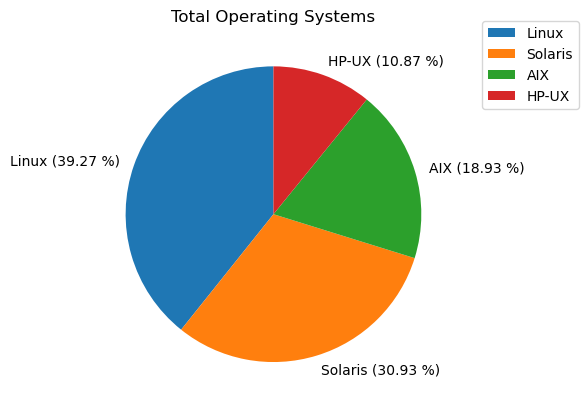

In [24]:
sizes = df_pie['cantidad']

pie = plt.pie(sizes, labels=labels, startangle=90)

plt.legend(pie[0], df_pie['os'], bbox_to_anchor=(1, 0.7), loc="lower right", fontsize=10, bbox_transform=plt.gcf().transFigure)

plt.title('Total Operating Systems')

plt.show()


## Figura con todos los graficos juntos

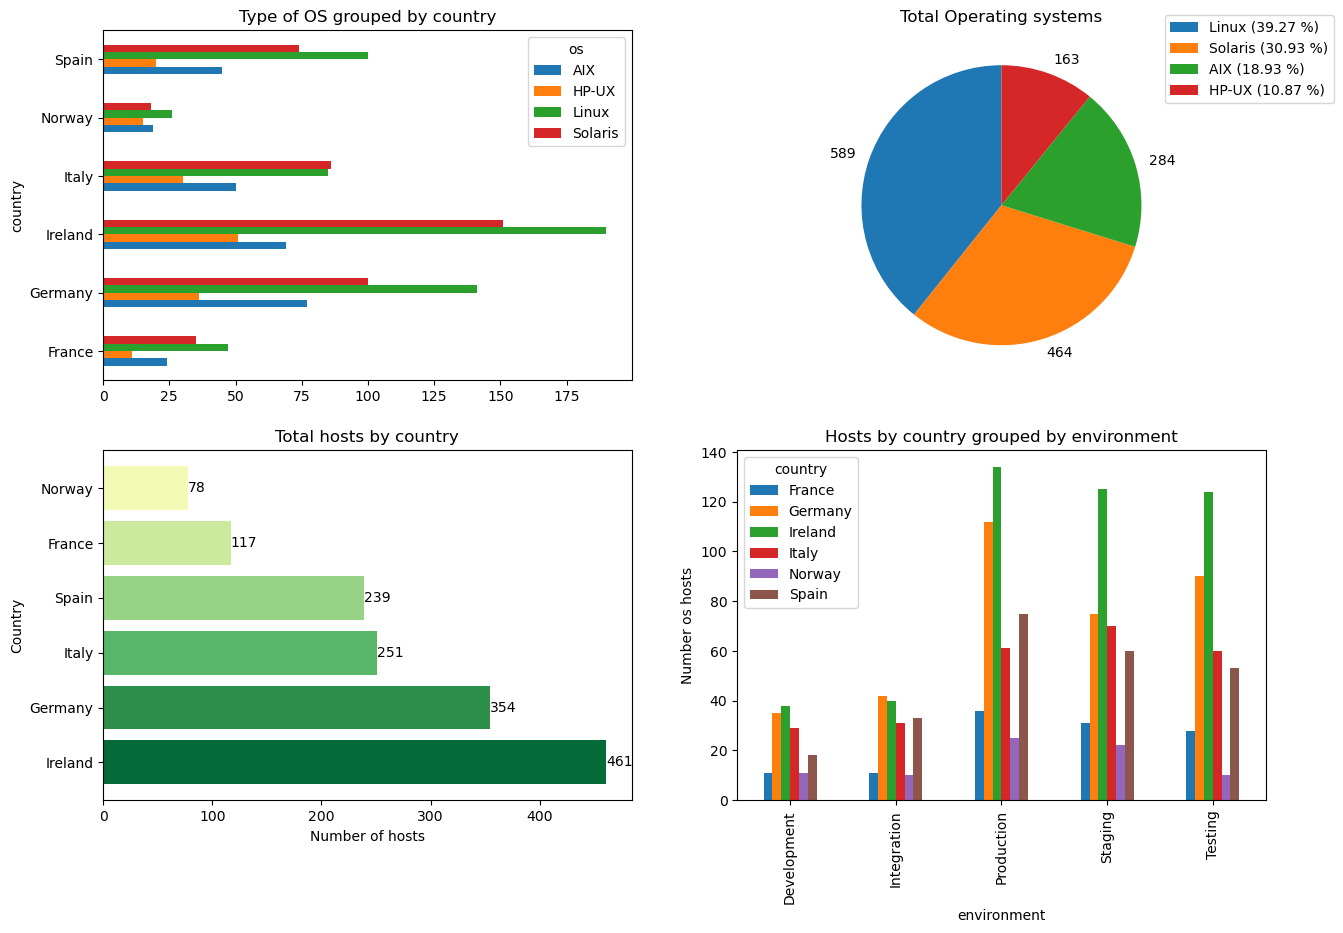

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Figura 1(Arriba Izquierda)
axs[0, 0].set_title('Type of OS grouped by country')
type_os.plot(kind='barh',ax=axs[0,0])

# Figura 2 (Abajo Izquierda)
grafico = axs[1,0].barh(y=df_hosts_country['country'] , width=df_hosts_country['Number of hosts'],color=sns.color_palette("YlGn_r"));
axs[1,0].bar_label(grafico, label_type="edge")
axs[1,0].set_title('Total hosts by country')
axs[1,0].set_ylabel('Country')
axs[1,0].set_xlabel('Number of hosts')

# Figura 3 (Abajo Derecha)
numero_paises_df.plot(kind='bar',ax=axs[1,1],legend=True)
axs[1,1].set_title('Hosts by country grouped by environment')
axs[1,1].set_ylabel('Number os hosts')

# Figura 4 (Arriba Derecha)
pie = axs[0,1].pie(sizes, labels=sizes,startangle=90);
axs[0,1].legend(pie[0],labels, bbox_to_anchor=(.95,0.8), loc="lower right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
axs[0,1].set_title('Total Operating systems');